<a href="https://colab.research.google.com/github/adityayadav4507/Foundation_of_ML/blob/main/23_Lec_SGD_%26_GD_comparsion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Generate synthetic Data

data look like y=3*x + 7 + some noise

In [ ]:
def generate_data(num):
  np.random.seed(42)
  X= np.random.rand(num ,1)*10  # features
  y = 3*X + 7 + np.random.randn(num,1) # Target with some noise

  return X , y

# Mean Squared error ( Loss function )

In [ ]:
def compute_loss(y_pre ,y_true):
  return np.mean((y_pre - y_true) ** 2)

# Batch/vanilla Gradient Descent (normal GD)

In [ ]:
def batch_gradient_descent(X , y , epochs , lr=0.01): #epochs means no of iteration
  m , n = X.shape
  X = np.c_[np.ones((m,1)),X] # add bias term
  theta=np.random.randn(n+1,1)
  losses=[]
  for epoch in range(epochs):
    y_pre = X.dot(theta)
    error=y_pre - y
    gradient = 2/n * X.T.dot(error) # take  derivative X.T == x transpose
    theta -= lr*gradient
    loss = compute_loss(y_pre,y)
    losses.append(loss)
  return theta , losses



# Stochastic gradient Descent


In [ ]:
def SGD(X , y, epochs, lr=0.01):
  m,n=X.shape
  X = np.c_[np.ones((m,1)),X]
  theta = np.random.randn(n+1,1)
  losses=[]

  for epoch in range(epochs):
      random_index = np.random.randint(m) # picking a random data point from 1 to m to calculate GD
      xi = X[random_index:random_index+1]
      yi = y[random_index:random_index+1]
      y_pre = xi.dot(theta)  # xi=[2 1] theta=[m,c](vertical)  xi.dot(theta)=2m+c==y_pre
      error = y_pre - yi
      gradient = 2/m *xi.T.dot(error)
      theta -= lr*gradient
      loss = compute_loss(y_pre,yi)
      losses.append(loss)

  return theta , losses

# comparsion on small and lasrge dataset

In [ ]:
small_dataset_size=1000
large_dataset_size=100000000

x_small , y_small = generate_data(small_dataset_size)
x_large , y_large = generate_data(large_dataset_size)

# Run Batch GD

In [ ]:
# for small dataset
starting_time=time.time()
theta_bgd_small , losses_bgd_small = batch_gradient_descent(x_small, y_small, epochs=50)
time_bgd_small = time.time()-starting_time

# for large data set
starting_time=time.time()
theta_bgd_large , losses_bgd_large = batch_gradient_descent(x_large, y_large, epochs=50)
time_bgd_large = time.time()-starting_time

/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:127: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)
<ipython-input-45-1c94458e0427>:2: RuntimeWarning: overflow encountered in square
  return np.mean((y_pre - y_true) ** 2)
<ipython-input-46-5878369ee105>:10: RuntimeWarning: invalid value encountered in subtract
  theta -= lr*gradient


# Run Stochastic Gradient Descent

In [ ]:
# for small dataset
starting_time=time.time()
theta_sgd_small , losses_sgd_small=SGD(x_small , y_small , epochs=50)
time_sgd_small =time.time() - starting_time

# for large dataset
starting_time=time.time()
theta_sgd_large , losses_sgd_large=SGD(x_large , y_large , epochs=50)
time_sgd_large =time.time() - starting_time


# Print time and losses

In [ ]:
print("BGD (small dataset) : Time =" , time_bgd_small , "final Loss =" , losses_bgd_small[-1])
print("BGD (large dataset) : Time =" , time_bgd_large , "final Loss =" , losses_bgd_large[-1])
print("SGD (small dataset) : Time =" , time_sgd_small , "final Loss =" , losses_sgd_small[-1])
print("SGD (large dataset) : Time =" , time_sgd_large , "final Loss =" , losses_sgd_large[-1])

BGD (small dataset) : Time = 0.003252267837524414 final Loss = 1.2281896410594296e+279
BGD (large dataset) : Time = 78.46567368507385 final Loss = nan
SGD (small dataset) : Time = 0.0025501251220703125 final Loss = 1732.2740343450873
SGD (large dataset) : Time = 0.9051468372344971 final Loss = 599.4259543835559


# Plot the graph

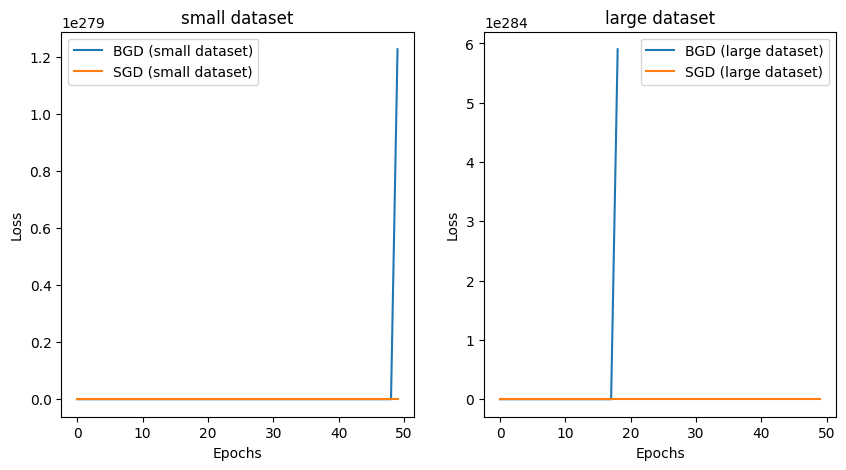

In [ ]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(losses_bgd_small,label="BGD (small dataset)")
plt.plot(losses_sgd_small,label="SGD (small dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("small dataset")
plt.subplot(1,2,2)

plt.plot(losses_bgd_large,label="BGD (large dataset)")
plt.plot(losses_sgd_large,label="SGD (large dataset)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("large dataset")
plt.show()